In [7]:
import spacy
import numpy as np
nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

# Définition de la fonction get_word_vectors()

In [8]:
def get_word_vectors(liste):
    listeVectors = []
    for word in liste :
        listeVectors.append(nlp(word).vector)
    return listeVectors

# 40 mots les plus utilisés dans chacun des deux fichiers

In [9]:
#Telecherger le 1er fichie 
f=open("Text_data_1.txt", "r") 
f1 = f.readlines()
listeFichie1 = []
for ligne in f1 :
    for token in(nlp(ligne)) :
        if token.text != '\n' : 
            listeFichie1.append(token)
#supprimer les stop-words           
stopList = list(spacy.lang.en.stop_words.STOP_WORDS)
ponct = [',','.','!','?','\n',';',':','"','“','”','‘','(',')',"'",'[',']','--','...','/'] 
stopList.extend(ponct) 
listeFichie1 = [token for token in listeFichie1 if token.text not in stopList]
listeFichie1= [token for token in listeFichie1 
                       if token.lemma_ !='-PRON-'
                       and token.lemma_ != '-'
                       and token.pos_ != 'VERB'
                      ]

#Création du dictionaire
listeFichie1 = [token.lemma_ for token in listeFichie1]
nbrApparition = dict()

for token in listeFichie1 :
        if token  not in nbrApparition :
            nbrApparition[token] = 1
        else :
             nbrApparition[token] += 1
#Trier le dictionaire 
SortedListToken = sorted(nbrApparition, key=nbrApparition.get, reverse=True)
#La liste des quarante mots les plus utilisés
liste1_40mots = SortedListToken[:40]

#_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

#Telecherger le 2eme fichie 
f=open("Text_data_2.txt", "r") 
f2 = f.readlines()
listeFichie2 = []
for ligne in f2 :
    for token in(nlp(ligne)) :
        if token.text != '\n' : 
            listeFichie2.append(token)
            
listeFichie2 = [token for token in listeFichie2 if token.text not in stopList]

listeFichie2= [token for token in listeFichie2
                       if token.lemma_ !='-PRON-'
                       and token.lemma_ != '-'
                       and token.pos_ != 'VERB'
                      ]
#Création du dictionaire
listeFichie2 = [token.lemma_ for token in listeFichie2]#récupération des lemmes
nbrApparition = dict()

for token in listeFichie2 :
        if token  not in nbrApparition :
            nbrApparition[token] = 1
        else :
             nbrApparition[token] += 1
#Trier le dictionaire 
SortedListToken = sorted(nbrApparition, key=nbrApparition.get, reverse=True)
#création de la liste des quarante mots les plus utilisés
liste2_40mots = SortedListToken[:40]

In [16]:
print('La liste de 40 mots les plus utilisés das fichier 1 est : \n ',liste1_40mots)
print('\n La liste de 40 mots les plus utilisés das fichier 2 est : \n ',liste2_40mots)

La liste de 40 mots les plus utilisés das fichier 1 est : 
  ['China', 'air', 'pollution', 'coal', 'quality', 'power', 'year', 'and', 'but', 'global', 'government', 'solar', 'datum', 'country', 'actually', 'energy', 'PM2.5', 'US', 'statistic', 'this', 'clean', 'so', 'environmental', 'course', 'consumption', 'carbon', 'one', 'good', 'people', 'chinese', 'environment', 'policy', 'like', 'fact', 'world', 'in', 'reduction', 'climate', 'emission', 'the']

 La liste de 40 mots les plus utilisés das fichier 2 est : 
  ['energy', 'relationship', 'and', 'like', 'power', 'problem', 'but', 'coal', 'okay', 'question', 'so', 'plant', 'calorie', 'be', 'thing', 'day', 'the', 'human', 'well', 'electricity', 'good', 'that', 'mile', 'there', 'journalist', 'role', 'here', 'physics', 'smart', 'because', 'insignificant', 'year', 'grid', 'step', 'communication', 'beer', 'laughter', 'ago', 'use', 'then']


# PCA algorithm

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(get_word_vectors(liste1_40mots)) 
word_vecs_2d_F1 = pca.transform(get_word_vectors(liste1_40mots))

pca2 = PCA(n_components = 2)
pca2.fit(get_word_vectors(liste2_40mots)) 
word_vecs_2d_F2 = pca2.transform(get_word_vectors(liste2_40mots))

# Affichage 

### Figure1

Text(0.5,1,'Figure1')

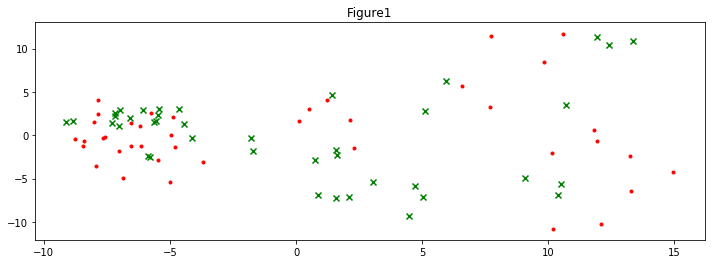

In [52]:
# fichier 1
word_vecs_2d_F1_X = [] 
word_vecs_2d_F1_Y = [] 

for mot in word_vecs_2d_F1 :
    word_vecs_2d_F1_X.append(mot[0])
    word_vecs_2d_F1_Y.append(mot[1])

 # fichier 2   
word_vecs_2d_F2_X = [] 
word_vecs_2d_F2_Y = [] 

for mot in word_vecs_2d_F2 :
    word_vecs_2d_F2_X.append(mot[0])
    word_vecs_2d_F2_Y.append(mot[1])

plt.scatter(word_vecs_2d_F1_X,word_vecs_2d_F1_Y,marker='x',c='g')
plt.scatter(word_vecs_2d_F2_X,word_vecs_2d_F2_Y,marker='.',c='r')
plt.title('Figure1')

### Figure2

Text(0.5,1,'Figure2')

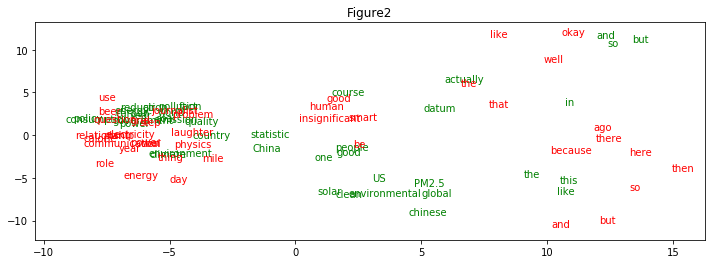

In [51]:
plt.scatter(word_vecs_2d_F1_X,word_vecs_2d_F1_Y,c='w')
plt.scatter(word_vecs_2d_F2_X,word_vecs_2d_F2_Y,c='w')

i=0
for word in word_vecs_2d_F1:
    plt.annotate(liste40motsF1[i],(word[0],word[1]),color='green')
    i+=1
    
i=0
for word in word_vecs_2d_F2:
    plt.annotate(liste40motsF2[i],(word[0],word[1]),color='red')
    i+=1
plt.title('Figure2')

In [ ]:
### 